In [346]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import re

In [ ]:
!conda install --yes --prefix {sys.prefix} openpyxl

In [ ]:
!conda install --yes --prefix {sys.prefix} geopandas

In [347]:
df = pd.read_excel('TotalPopFemale.xlsx', usecols=[1, 2, 4], skiprows = 1, names=['continent', 'year', 'population'])
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [348]:
continents = df.continent.unique()

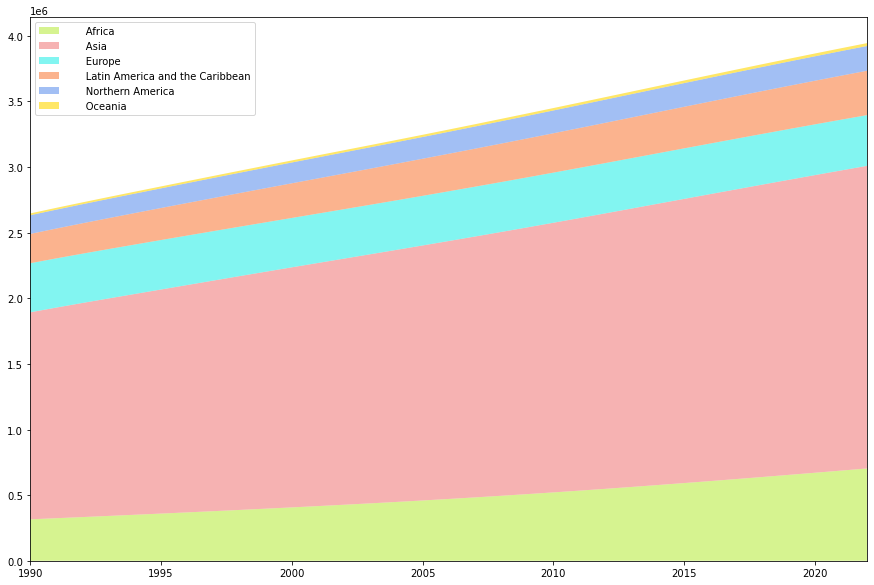

In [349]:
fig, line = plt.subplots(figsize=(15, 10))
year = df.year.unique()
population = []

for name, group in df.groupby('continent'):
    population.append(group.population)

plt.xlim(1990, 2022)
plt.stackplot(year, population[0], population[1], population[2], population[3], population[4], population[5], 
              colors=colors, labels=continents, alpha=0.6)
plt.legend(loc='upper left')
plt.show()

In [350]:
data2021 = df.loc[df['year'] == 2021]
data2021 = data2021.drop(['year'], axis=1)
data2021.reset_index(drop=True, inplace=True)
data2021.iloc[0, 0] = 'Africa'
data2021.iloc[1, 0] = 'Asia'
data2021.iloc[2, 0] = 'Europe'
data2021.iloc[3, 0] = 'South America'
data2021.iloc[4, 0] = 'North America'
data2021.iloc[5, 0] = 'Oceania'

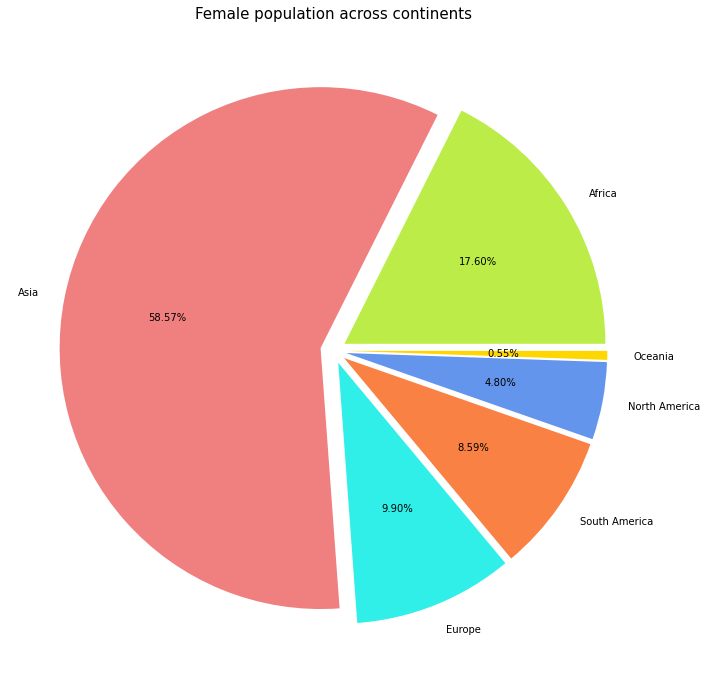

In [351]:
chart_explode = [0.05]*6
plt.figure(figsize=(15, 12))
plt.pie(data2021.population, labels=data2021.continent, explode=chart_explode, colors=colors, autopct='%1.2f%%')
plt.title("Female population across continents", fontsize=15)
plt.show()

In [352]:
data2022.loc[len(data2021)] = ['Antarctica', 0.0]

In [353]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map = pd.merge(world, data2021, how='left', on='continent')

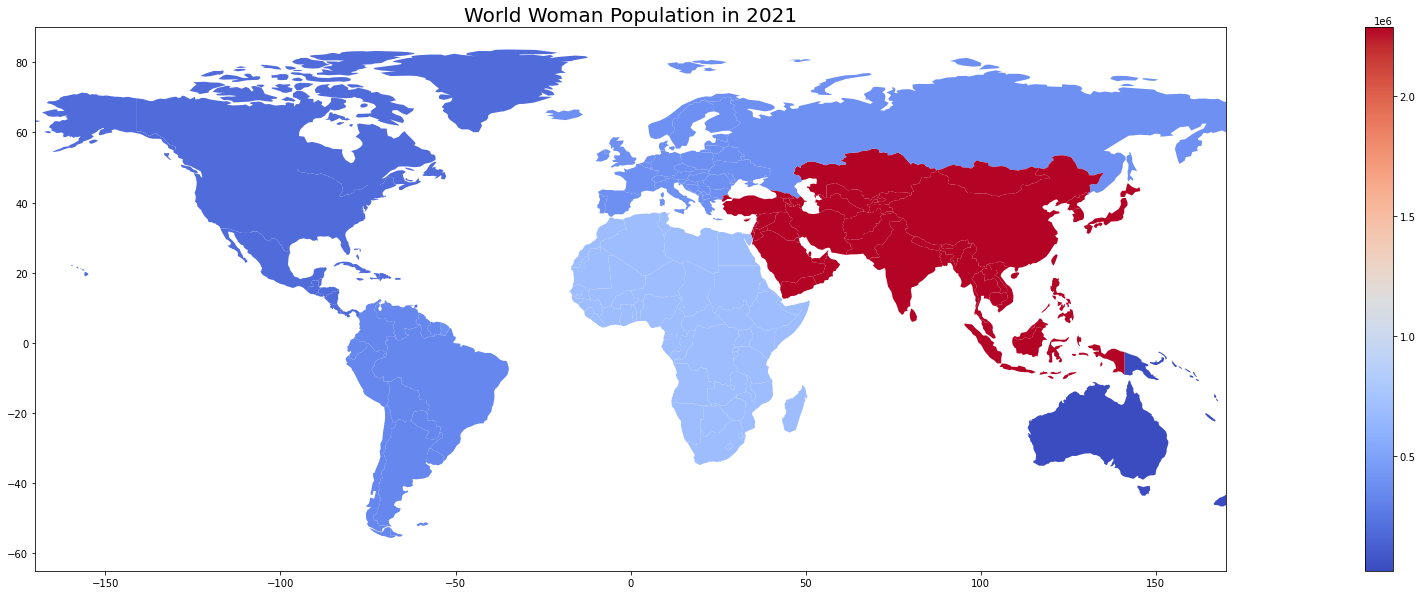

In [364]:
world_map.plot(column='population', figsize=(50, 10), cmap=plt.cm.coolwarm, legend=True)
plt.title('World Woman Population in 2021', fontsize=20)
plt.xlim(-170, 170)
plt.ylim(-65, 90)
plt.show()

In [355]:
us_raw = pd.read_csv('USFemalePop.csv', names=['state_pop'], sep="\s+")
us_raw = us_raw .drop([0,1,2])
us_raw = us_raw.drop(range(56, 66))
us_raw.reset_index(drop=True, inplace=True)

In [356]:
arr = []
for d in us_raw['state_pop']:
    data = re.sub(r"(state_pop\s*)|\"", "", d)
    data = re.split(r"\,", data)
    data[1] = int(data[1])
    arr.append(data)
print("US Female Population in 2021: ", arr[0][1])

US Female Population in 2021:  163000000


In [357]:
us_df = pd.DataFrame(data=arr[1:], columns=['NAME', 'POPULATION'])

In [358]:
geo_usa = gpd.read_file('./shapefiles')
us_map = pd.merge(geo_usa, us_df, how='left', on='NAME')

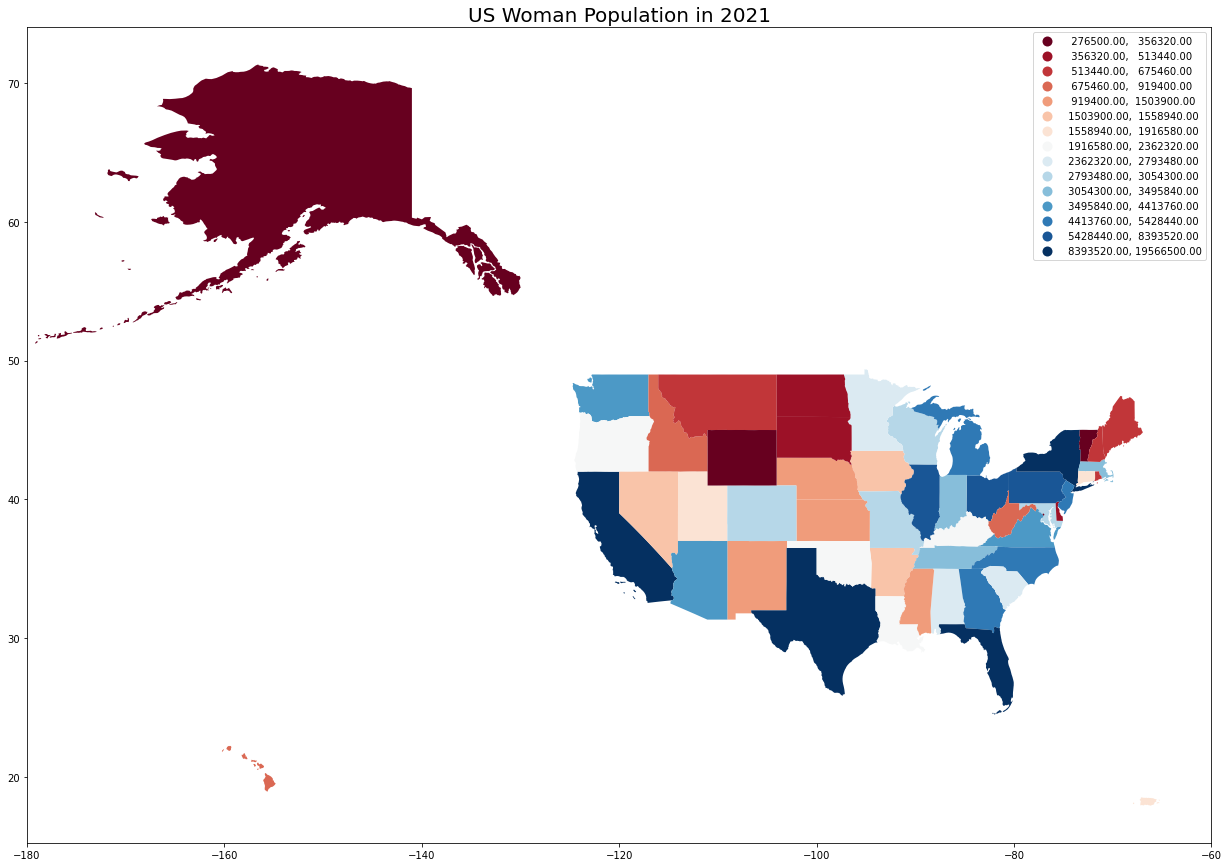

In [360]:
us_map.plot(column='POPULATION', figsize=(35, 15),  scheme="quantiles", k=15, legend=True, cmap=plt.cm.RdBu)
plt.xlim(-180, -60)
plt.title("US Woman Population in 2021", fontsize=20)
plt.show()

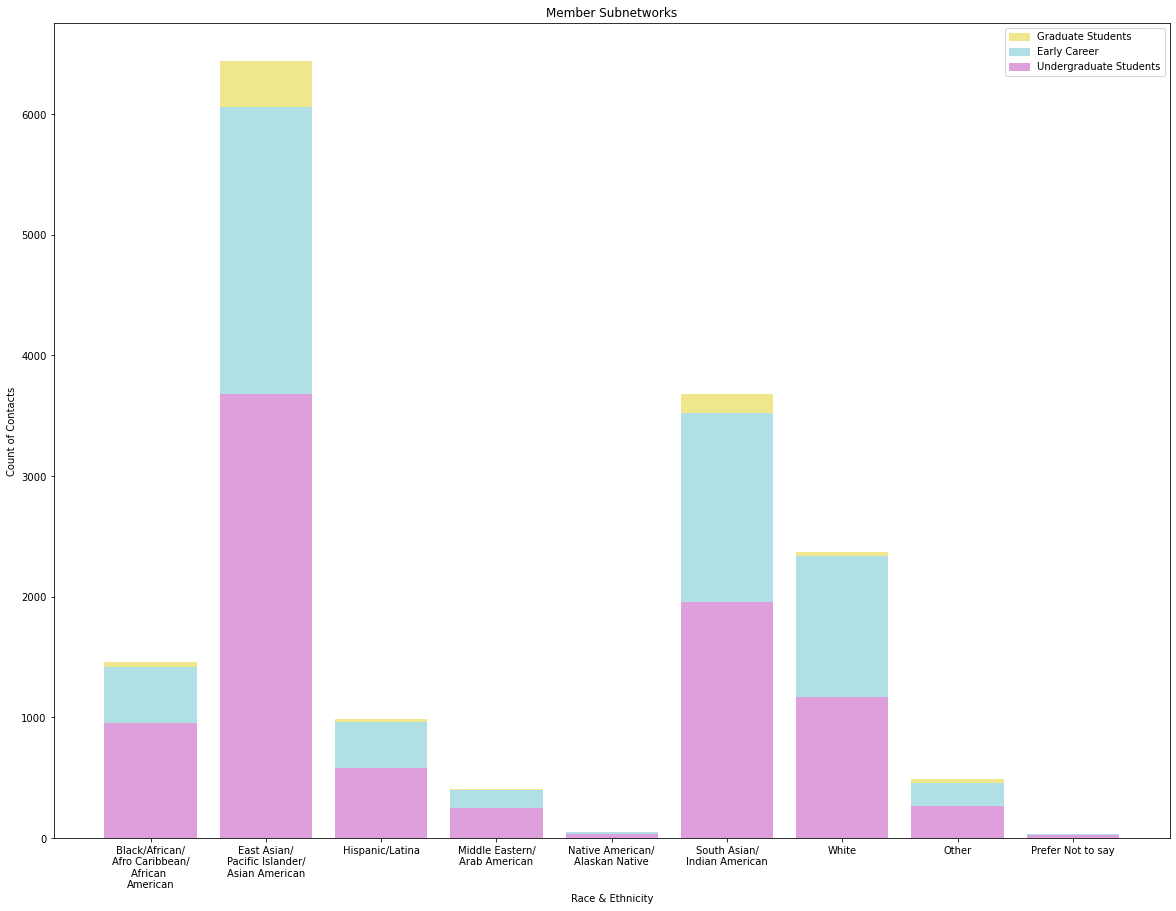

In [361]:
x = ['Black/African/\nAfro Caribbean/\nAfrican \nAmerican', 'East Asian/\nPacific Islander/\nAsian American', 
     'Hispanic/Latina', 'Middle Eastern/\nArab American', 'Native American/\nAlaskan Native', 'South Asian/\nIndian American',
     'White', 'Other', 'Prefer Not to say']
y1 = np.array([954, 3676, 576, 245, 30, 1952, 1167, 263, 24])
y2 = np.array([467, 2378, 389, 155, 19, 1571, 1168, 192, 9])
y3 = np.array([34, 381, 22, 10, 1, 155, 37, 31, 2])
  
plt.figure(figsize=(20, 15))
# plot bars in stack manner
plt.bar(x, y1, color="plum")
plt.bar(x, y2, bottom=y1, color="powderblue")
plt.bar(x, y3, bottom=y1+y2, color="khaki")

plt.xlabel("Race & Ethnicity")
plt.ylabel("Count of Contacts")
handles = [mpatches.Patch(color=color, label=label) for label, color in [('Graduate Students', "khaki"), 
                                                                         ('Early Career', "powderblue"), 
                                                                         ('Undergraduate Students', "plum")]]
plt.legend(handles=handles, loc="upper right", frameon=True)
plt.title("Member Subnetworks")
plt.show()